In [1]:
# !pip install dvc_gdrive

### 1. Initialize DVC

In [1]:
# Convert this repository into a Git repository
!git init

Initialized empty Git repository in C:/Users/ALENA MARIA THOMAS/Applied-Machine-Learning/Assignment 2/.git/


In [2]:
!dvc init

Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>


In [3]:
# Track the data version using google drive as storage 
!dvc remote add -d storage_remote gdrive://1K-AYfX5NaNNHoh-31vQ5VThmdu_1Nf31

Setting 'storage_remote' as a default remote.


### 2. Load and explore the dataset

In [ ]:
import numpy as np 
import pandas as pd 
import csv
from sklearn.model_selection import train_test_split

In [5]:
emails_df = pd.read_csv('raw_data.csv')
emails_df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [6]:
emails_df.shape

(5728, 2)

In [7]:
emails_df.spam.value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

### 3. Preprocess the text

Firstly, ensure that there are no missing values. 

In [8]:
emails_df.isna().sum()

text    0
spam    0
dtype: int64

Next, we split the data into X (features, i.e. 'text') and y (target, i.e. 'spam').

In [9]:
X = emails_df['text'].copy()
y = emails_df['spam'].copy()

Lastly, We remove punctuation marks from the email text as these typically do not contain much information in spam detection.

Also, since every entry of X starts with 'Subject:', we will be removing that as well as it is redundant and does not help with spam detection.

In [10]:
def preprocessing(text):
    new_text = ''
    for char in text[8:]:
        if char.isalnum() or char == " ":
            new_text += char
    return new_text

In [11]:
X = X.apply(preprocessing)
X.head()

0     naturally irresistible your corporate identit...
1     the stock trading gunslinger  fanny is merril...
2     unbelievable new homes made easy  im wanting ...
3     4 color printing special  request additional ...
4     do not have money  get software cds from here...
Name: text, dtype: object

### 4. Split the dataset into train/validation/test.

In [12]:
train_X, temp_X, train_y, temp_y = train_test_split(X, y, test_size = 0.3, random_state=2024)
val_X, test_X, val_y, test_y = train_test_split(temp_X, temp_y, test_size = 0.5, random_state=2024)    

### 5. Store the splits as train.csv/validation.csv/test.csv

Firstly, we combine the feature and target arrays to create the train/validation/test datasets.

In [13]:
train_df = pd.concat([train_X, train_y], axis = 1)
train_df.shape

(4009, 2)

In [14]:
val_df = pd.concat([val_X, val_y], axis = 1)
val_df.shape

(859, 2)

In [15]:
test_df = pd.concat([test_X, test_y], axis = 1)
test_df.shape

(860, 2)

Then, we save the datasets as .csv files

In [16]:
train_df.to_csv("train.csv", index = False)

In [17]:
val_df.to_csv("val.csv", index = False)

In [18]:
test_df.to_csv("test.csv", index = False)

### 6. Implementing DVC

In [19]:
# Start tracking the train/validation/test datasets.
!dvc add train.csv val.csv test.csv


To track the changes with git, run:

	git add val.csv.dvc test.csv.dvc .gitignore train.csv.dvc

To enable auto staging, run:

	dvc config core.autostage true


\u280b Checking graph



In [20]:
!git add train.csv.dvc val.csv.dvc test.csv.dvc .gitignore

In [21]:
# Upload the files to Github
!git commit -m "Random State 2024"

[master (root-commit) 6d1ee21] Random State 2024
 7 files changed, 24 insertions(+)
 create mode 100644 .dvc/.gitignore
 create mode 100644 .dvc/config
 create mode 100644 .dvcignore
 create mode 100644 .gitignore
 create mode 100644 test.csv.dvc
 create mode 100644 train.csv.dvc
 create mode 100644 val.csv.dvc


In [22]:
# Upload the files to the remote storage in Google drive
!dvc push

Everything is up to date.


### 7. Split the data again into train.csv/validation.csv/test.csv and push the new files.

In [24]:
train_X, temp_X, train_y, temp_y = train_test_split(X, y, test_size = 0.3, random_state=2002)
val_X, test_X, val_y, test_y = train_test_split(temp_X, temp_y, test_size = 0.5, random_state=2002)    

In [25]:
train_df = pd.concat([train_X, train_y], axis = 1)
train_df.shape

(4009, 2)

In [26]:
val_df = pd.concat([val_X, val_y], axis = 1)
val_df.shape

(859, 2)

In [27]:
test_df = pd.concat([test_X, test_y], axis = 1)
test_df.shape

(860, 2)

In [28]:
train_df.to_csv("train.csv", index = False)

In [29]:
val_df.to_csv("val.csv", index = False)

In [30]:
test_df.to_csv("test.csv", index = False)

In [31]:
!dvc add train.csv val.csv test.csv


To track the changes with git, run:

	git add val.csv.dvc train.csv.dvc test.csv.dvc

To enable auto staging, run:

	dvc config core.autostage true


\u280b Checking graph



In [32]:
!git add train.csv.dvc val.csv.dvc test.csv.dvc .gitignore

In [33]:
!git commit -m "Random State 2002"

[master 0f2435f] Random State 2002
 3 files changed, 6 insertions(+), 6 deletions(-)


In [34]:
!dvc push

Everything is up to date.


### 8.  Print the distributions of the target variable in both versions of the datasets.

In [35]:
# To display all of the commits in the repository's history
!git log

commit 0f2435f7cadb262a4c6959395e4f5407d8985b61
Author: AlenaThomas <alena.mt29@gmail.com>
Date:   Sun Feb 25 20:35:57 2024 +0530

    Random State 2002

commit 6d1ee21b20c7fa4e7bc3efa1654f1d4d6ea4b0eb
Author: AlenaThomas <alena.mt29@gmail.com>
Date:   Sun Feb 25 20:35:20 2024 +0530

    Random State 2024


In [36]:
!git log --oneline

0f2435f Random State 2002
6d1ee21 Random State 2024


Getting the first version, i.e. random state 2024

In [37]:
!git checkout 6d1ee21 train.csv.dvc val.csv.dvc test.csv.dvc

Updated 3 paths from 439e6dd


In [38]:
!dvc pull

M       train.csv
M       test.csv
M       val.csv
3 files modified


In [39]:
import matplotlib.pyplot as plt

def print_distribution(data, randomState, filename):
    freq = data['spam'].value_counts()
    print("Frequency table of 'spam' variable\n", freq)
    freq.plot(kind = "bar")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of 'spam' variable in {filename} dataset with random_state={randomState}")
    plt.show()

In [40]:
train_data = pd.read_csv('train.csv')
val_data = pd.read_csv('val.csv')
test_data = pd.read_csv('test.csv')

Frequency table of 'spam' variable
 spam
0    3057
1     952
Name: count, dtype: int64


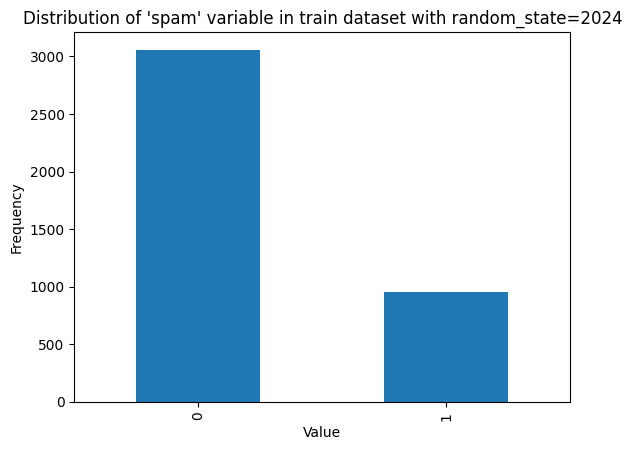

In [41]:
print_distribution(train_data, 2024, 'train')

Frequency table of 'spam' variable
 spam
0    651
1    208
Name: count, dtype: int64


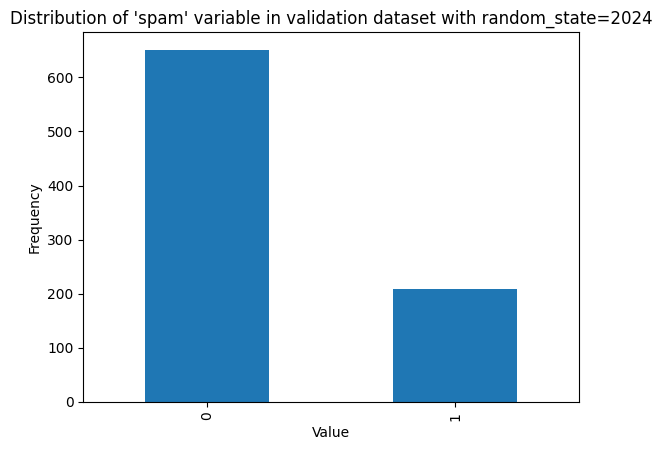

In [42]:
print_distribution(val_data, 2024, 'validation')

Frequency table of 'spam' variable
 spam
0    652
1    208
Name: count, dtype: int64


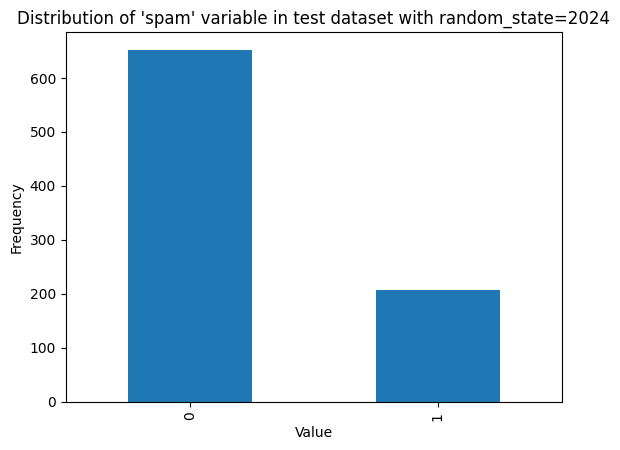

In [43]:
print_distribution(test_data, 2024, 'test')

Getting the second version, i.e. random_state = 2002

In [44]:
!git checkout 0f2435f train.csv.dvc val.csv.dvc test.csv.dvc

Updated 3 paths from 8253803


In [45]:
!dvc pull

M       train.csv
M       test.csv
M       val.csv
3 files modified


In [46]:
train_data = pd.read_csv('train.csv')
val_data = pd.read_csv('val.csv')
test_data = pd.read_csv('test.csv')

Frequency table of 'spam' variable
 spam
0    3051
1     958
Name: count, dtype: int64


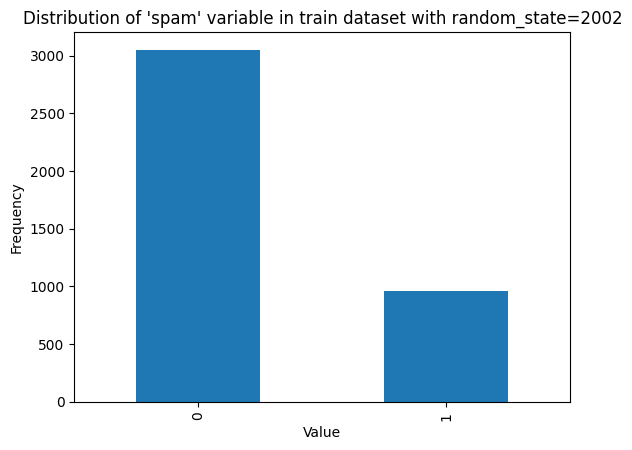

In [47]:
print_distribution(train_data, 2002, 'train')

Frequency table of 'spam' variable
 spam
0    648
1    211
Name: count, dtype: int64


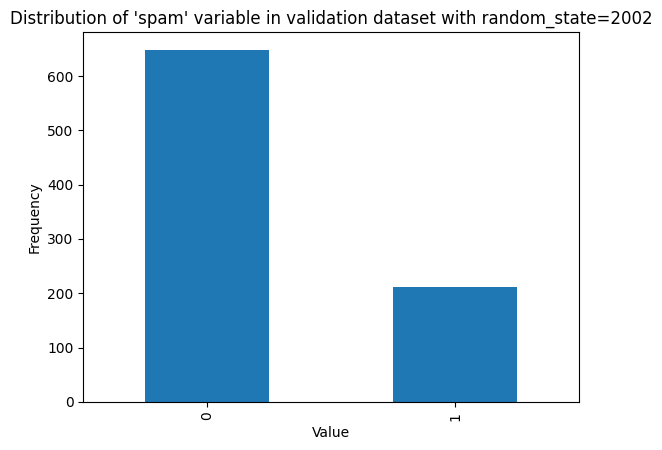

In [49]:
print_distribution(val_data, 2002, 'validation')

Frequency table of 'spam' variable
 spam
0    661
1    199
Name: count, dtype: int64


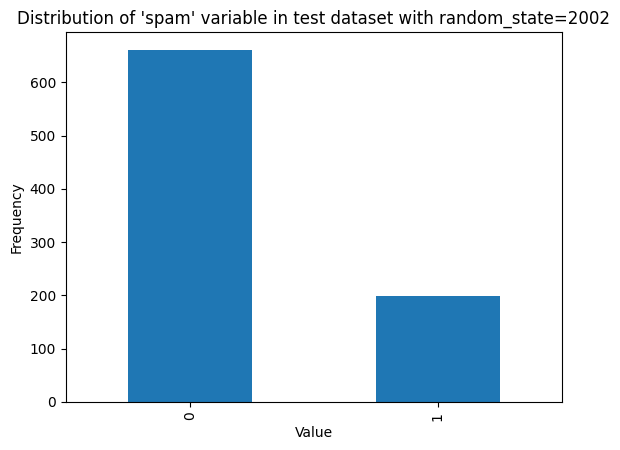

In [50]:
print_distribution(test_data, 2002, 'test')